### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
geo_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/geo_df.csv')


geo_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zip_start,zip_end
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,Friday,Friday,18,18,August,6.63,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,Friday,Friday,1,1,August,9.52,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,Sunday,Sunday,13,13,August,10.13,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,Thursday,Thursday,22,22,August,19.32,POINT (-74.02778059244156 40.73698221818716),549.0,7030,7307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,Monday,Monday,14,14,August,13.38,POINT (-74.03891444206238 40.71835519823214),414.0,7302,7306


#### PIE CHART - CLASSIFYING USER CATEGORY

In [3]:
# TOTAL COUNT OF USER TYPE CATEGORIZED AS MEMBER/CASUAL
User_type = pd.DataFrame(geo_df['member_casual'].value_counts())
User_type.columns=['count']

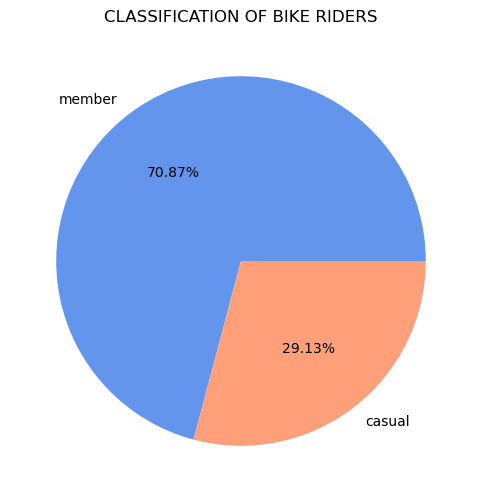

In [4]:
#size of the plot
plt.figure(figsize = (10, 6))

#title of graph
plt.title('CLASSIFICATION OF BIKE RIDERS',fontsize=12,loc='center')

#create the pie chart
plt.pie(User_type['count'],labels=User_type.index,autopct = '%1.2f%%',colors=['cornflowerblue','lightsalmon'])

#display the graph
plt.show()

- User are of two categories - Subscriber and Member.
- Members are more than twice the count of casual user type.

#### AVERAGE DISTRIBUTION OF TRIP DURATION - HISTOGRAM

In [5]:
#average trip duration
np.round(geo_df['tripduration'].mean(),2)

9.59

In [6]:
geo_df['tripduration'].mode()

0    4.65
Name: tripduration, dtype: float64

In [7]:
#peak tripduration
pd.DataFrame(geo_df['tripduration'].value_counts().sort_values(ascending = False).head(1)) 

,count
tripduration,
4.65,1918


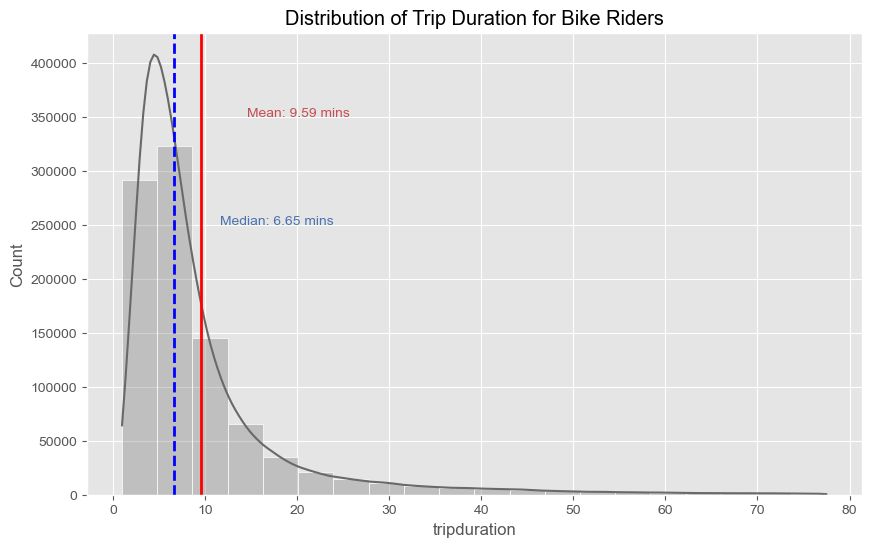

In [8]:
#size of the plot
plt.figure(figsize = (10, 6))

#Title of the graph
plt.title('Distribution of Trip Duration for Bike Riders')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(geo_df["tripduration"], kde = True, bins=20, color = "dimgray", alpha = 0.3, linewidth = .5)

plt.axvline(geo_df["tripduration"].mean(), color='red', linestyle='-', linewidth=2)
plt.text(geo_df['tripduration'].mean() + 5, 350000,
       'Mean: {:.2f} mins'.format(geo_df['tripduration'].mean()),
       size='small',color='r');

plt.axvline(geo_df["tripduration"].median(), color='blue', linestyle='--', linewidth=2)
plt.text(geo_df['tripduration'].median() + 5, 250000,
       'Median: {:.2f} mins'.format(geo_df['tripduration'].median()),
       size='small',color='b');



#display the graph
plt.show()

#### DISTRIBUTION OF TRIP DURATION FOR BIKERS - BOXPLOT

In [9]:
# average trip duration for member and casual
UT_TD = np.round(geo_df.groupby('member_casual', as_index = True)[['tripduration']].mean() ,2)
UT_TD 

,tripduration
member_casual,
casual,13.02
member,8.18


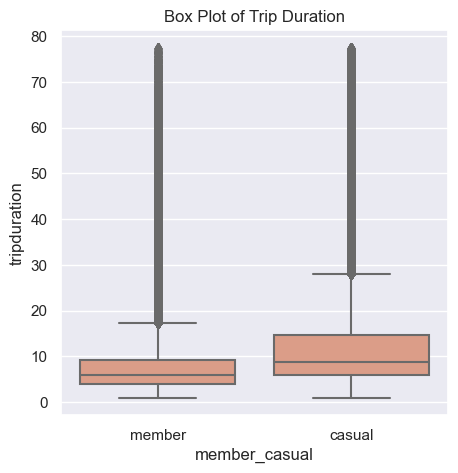

In [10]:
#size of the plot
plt.figure(figsize = (5, 5))

#Title of the graph
plt.title('Box Plot of Trip Duration')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the violin plot
sns.boxplot(data=geo_df, y="tripduration", x="member_casual",color='darksalmon')

#display the gr#aph
plt.show()

#### DISTRIBUTION OF TRIP DURATION FOR BIKERS - VIOLIN 

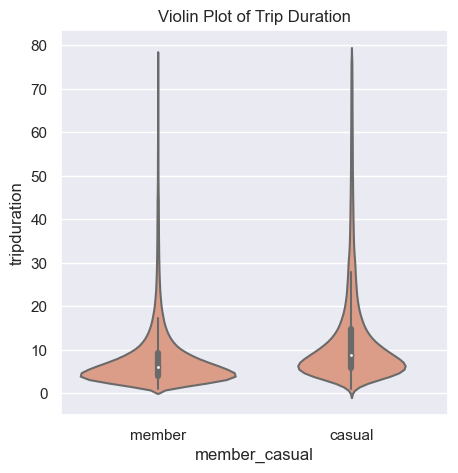

In [11]:
#size of the plot
plt.figure(figsize = (5, 5))

#Title of the graph
plt.title('Violin Plot of Trip Duration')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the violin plot
sns.violinplot(data=geo_df, y="tripduration", x="member_casual",color='darksalmon')

#display the gr#aph
plt.show()

#### AVERAGE DISTRIBUTION OF TRIP DURATION FOR MEMBERS- HISTOGRAM

In [12]:
mdf = geo_df[geo_df['member_casual'] == 'member']

print(np.round(mdf['tripduration'].mean(),2))

print(np.round(mdf['tripduration'].median(),2))

print(np.round(mdf['tripduration'].mode(),2))


8.18
5.95
0    4.18
Name: tripduration, dtype: float64


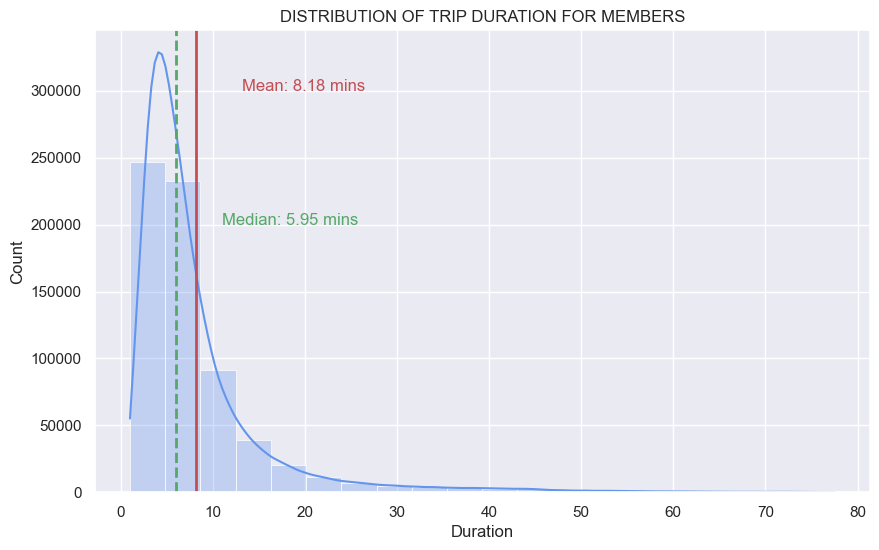

In [13]:
#size of the plot
fig, ax = plt.subplots(figsize=(10,6))


#Title of the graph
plt.title('DISTRIBUTION OF TRIP DURATION FOR MEMBERS')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(mdf["tripduration"], kde = True, bins=20, color = "cornflowerblue", alpha = 0.3, linewidth = .5)

plt.axvline(mdf["tripduration"].mean(), color='r', linestyle='-', linewidth=2)
plt.text(mdf['tripduration'].mean() + 5, 300000,
       'Mean: {:.2f} mins'.format(mdf['tripduration'].mean()),
       size='medium',color='r');


plt.axvline(mdf["tripduration"].median(), color='g', linestyle='--', linewidth=2)
plt.text(mdf['tripduration'].median() +5, 200000,
       'Median: {:.2f} mins'.format(mdf['tripduration'].median()),
       size='medium',color='g');

plt.ylabel('Count')
plt.xlabel('Duration')


#display the graph
plt.show()

#### AVERAGE DISTRIBUTION OF TRIP DURATION FOR CASUALS- HISTOGRAM

In [14]:
cdf = geo_df[geo_df['member_casual'] == 'casual']

print(np.round(cdf['tripduration'].mean(),2))

print(np.round(cdf['tripduration'].median(),2))

print(np.round(cdf['tripduration'].mode(),2))

13.02
8.77
0    5.77
Name: tripduration, dtype: float64


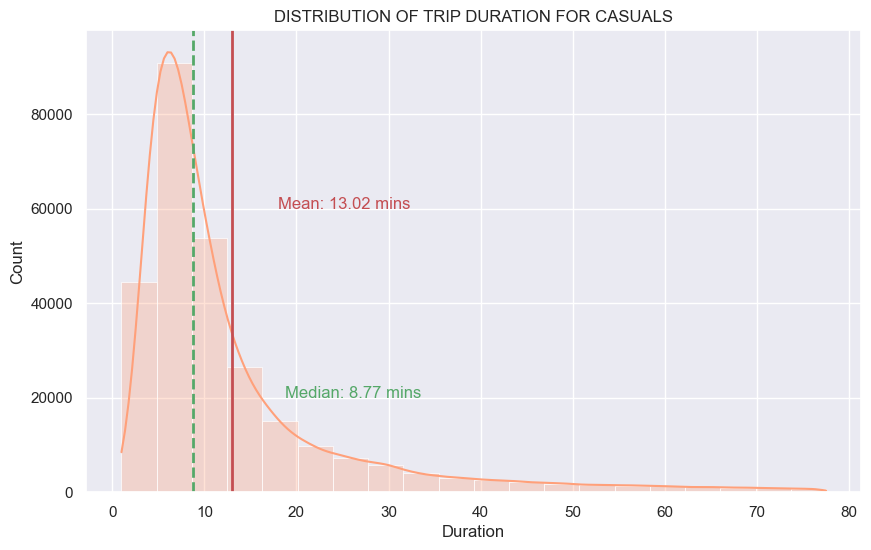

In [15]:
#size of the plot
plt.figure(figsize = (10, 6))

#Title of the graph
plt.title('DISTRIBUTION OF TRIP DURATION FOR CASUALS')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(cdf["tripduration"], kde = True, bins=20, color = "lightsalmon", alpha = 0.3, linewidth = .5)


plt.axvline(cdf["tripduration"].mean(), color='r', linestyle='-', linewidth=2)
plt.text(cdf['tripduration'].mean() + 5, 60000,
      'Mean: {:.2f} mins'.format(cdf['tripduration'].mean()),
       size='medium',color='r');

plt.axvline(cdf["tripduration"].median(), color='g', linestyle='--', linewidth=2)
plt.text(cdf['tripduration'].median() +10, 20000,
       'Median: {:.2f} mins'.format(cdf['tripduration'].median()),
       size='medium',color='g');

plt.ylabel('Count')
plt.xlabel('Duration')



#display the graph
plt.show()

